In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as pl


In [2]:
# Lectura del dataset
internet = pd.read_csv('/Users/pabloclementi/Desktop/Proyecto2/data/internet_final.csv')

In [3]:
internet.describe()


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_acceso_teconologia,...,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_acceso_velocidad,Banda ancha fija,Dial up,Total,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02,...,960.000000,960.000000,960.000000,9.600000e+02,960.000000,9.600000e+02,9.600000e+02,960.000000,9.600000e+02,960.000000
mean,2018.500000,2.500000,51.662405,15.394079,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.615411e+05,...,38112.431250,37303.288542,20197.090625,1.098851e+05,6043.608333,3.600074e+05,3.606255e+05,915.627083,3.615411e+05,21.615685
std,2.873778,1.118617,23.898192,9.168959,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.778954e+05,...,64565.358974,89536.515407,70534.758485,4.347858e+05,14503.710948,7.740852e+05,7.761374e+05,2309.442528,7.778954e+05,29.340345
min,2014.000000,1.000000,9.347208,2.684669,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.255700e+04,...,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04,1.219300e+04,0.000000,1.255700e+04,2.573729
25%,2016.000000,1.750000,32.856870,8.764189,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.900025e+04,...,3581.000000,2127.500000,36.750000,1.075000e+01,0.000000,5.882400e+04,5.892325e+04,5.000000,5.900025e+04,4.685122
50%,2018.500000,2.500000,48.817167,13.417453,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.111385e+05,...,12913.500000,10082.000000,1391.500000,2.418500e+03,58.000000,1.097050e+05,1.104735e+05,137.000000,1.111385e+05,8.885746
75%,2021.000000,3.250000,65.116858,19.657928,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883518e+05,...,40126.000000,26436.000000,9858.750000,3.533225e+04,6485.250000,1.880792e+05,1.883502e+05,618.250000,1.883518e+05,25.682270
max,2023.000000,4.000000,124.061394,52.236739,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.011620e+06,...,403575.000000,886678.000000,949093.000000,4.042646e+06,122762.000000,5.011620e+06,5.005720e+06,15229.000000,5.011620e+06,234.440000


In [4]:
# Veremos los outliers de las variables numéricas
for column in ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab', 'ADSL', 'Cablemodem', 
               'Fibra óptica', 'Wireless', 'Otros', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', 
               '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
               '+ 20 Mbps - 30 Mbps', 'OTROS', 'Banda ancha fija', 'Dial up', 'Mbps (Media de bajada)']:
    q1 = internet[column].quantile(0.25)
    q3 = internet[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = internet[(internet[column] < lower_bound) | (internet[column] > upper_bound)]
    print(f'Columna: {column}, Outliers: {outliers.shape[0]}')

Columna: Accesos por cada 100 hogares, Outliers: 20
Columna: Accesos por cada 100 hab, Outliers: 40
Columna: ADSL, Outliers: 129
Columna: Cablemodem, Outliers: 160
Columna: Fibra óptica, Outliers: 111
Columna: Wireless, Outliers: 81
Columna: Otros, Outliers: 113
Columna: HASTA 512 kbps, Outliers: 165
Columna: + 512 Kbps - 1 Mbps, Outliers: 114
Columna: + 1 Mbps - 6 Mbps, Outliers: 140
Columna: + 6 Mbps - 10 Mbps, Outliers: 114
Columna: + 10 Mbps - 20 Mbps, Outliers: 125
Columna: + 20 Mbps - 30 Mbps, Outliers: 124
Columna: OTROS, Outliers: 112
Columna: Banda ancha fija, Outliers: 160
Columna: Dial up, Outliers: 126
Columna: Mbps (Media de bajada), Outliers: 94


In [5]:
#Cantidad de registros outliers.
outliers.shape[0]

94

Teniendo en cuenta , que los registros de outliers no llegan a un 10%, y los datasets viene de un ente oficial, decidimos continuar y trabajar con los mismos para el analisis.

# Analisis de Variables.

Comportamiento de las diferentes tecnologias de internet a lo largo del tiempo

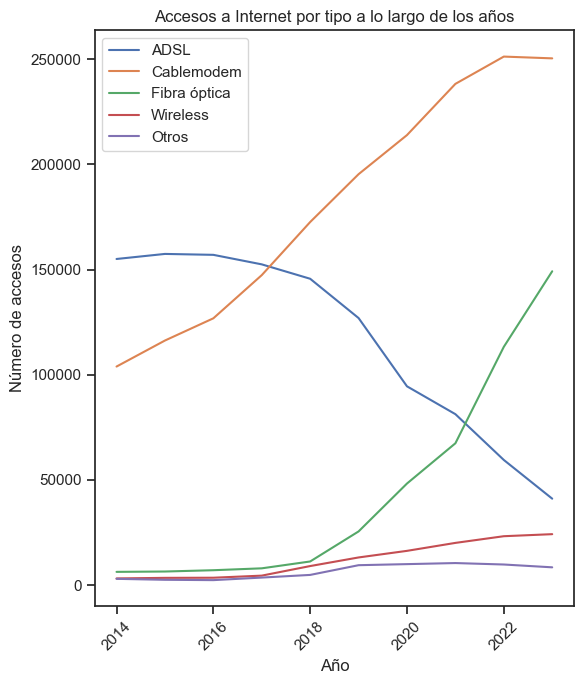

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')
plt.figure(figsize=(6, 7))

# Utilizamos un loop para agregar cada línea al mismo gráfico
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    sns.lineplot(x='Año', y=column, data=internet, label=column, errorbar=None)  

plt.title('Accesos a Internet por tipo a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)  # Rotar los labels en 45 grados para mejor visualización
plt.tight_layout()
plt.legend()
plt.show()

Claramente vemos como con el pasar de los años la tecnologia ADSL, ha ido disminuyendo en su cantidad de conexiones, notandose un fuerte avance en las tecnologia de cablemodem y fibra optica. 

Comportamiento de la velocidad de internet a lo largo del tiempo 
https://www.argentina.gob.ar/noticias/desde-2015-se-invirtieron-4000-millones-para-llevar-internet-mas-argentinos

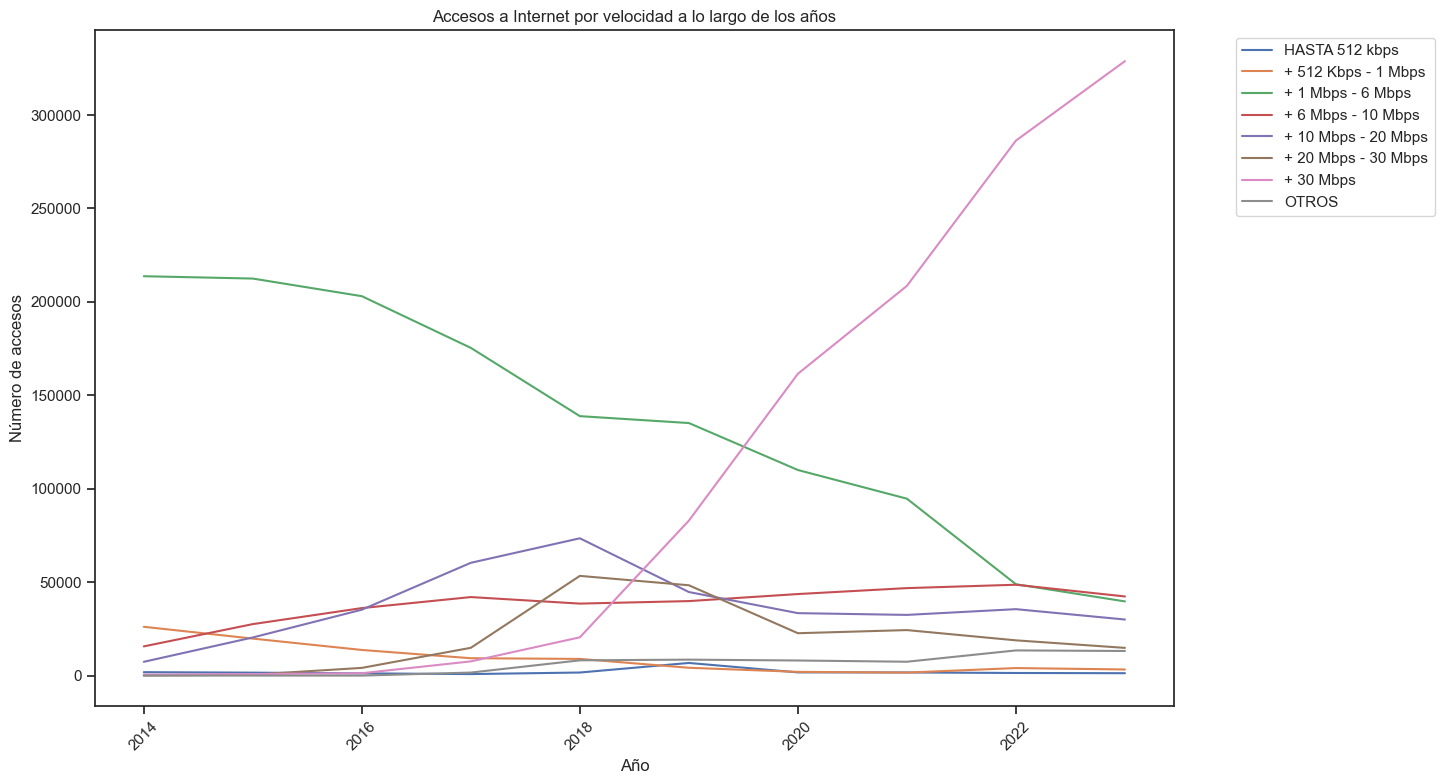

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')
plt.figure(figsize=(12, 8))

# Lista de categorías de velocidad
categorias = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
              '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
              '+ 30 Mbps', 'OTROS']

# Utilizamos un loop para agregar cada línea al mismo gráfico
for categoria in categorias:
    sns.lineplot(x='Año', y=categoria, data=internet, label=categoria, errorbar=None) 
plt.title('Accesos a Internet por velocidad a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)  # Rotar los labels en 45 grados para mejor visualización
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajusta la leyenda fuera del gráfico
plt.show()

Consecuentemente con el aumento de tecnologias modernas como cable modem y fibra optica a partir del año 2018 los accesos empezaron a ser mayores para velocidades superior a los 30 Mbps

Veremos la velociadad media de bajada a lo largo de los años

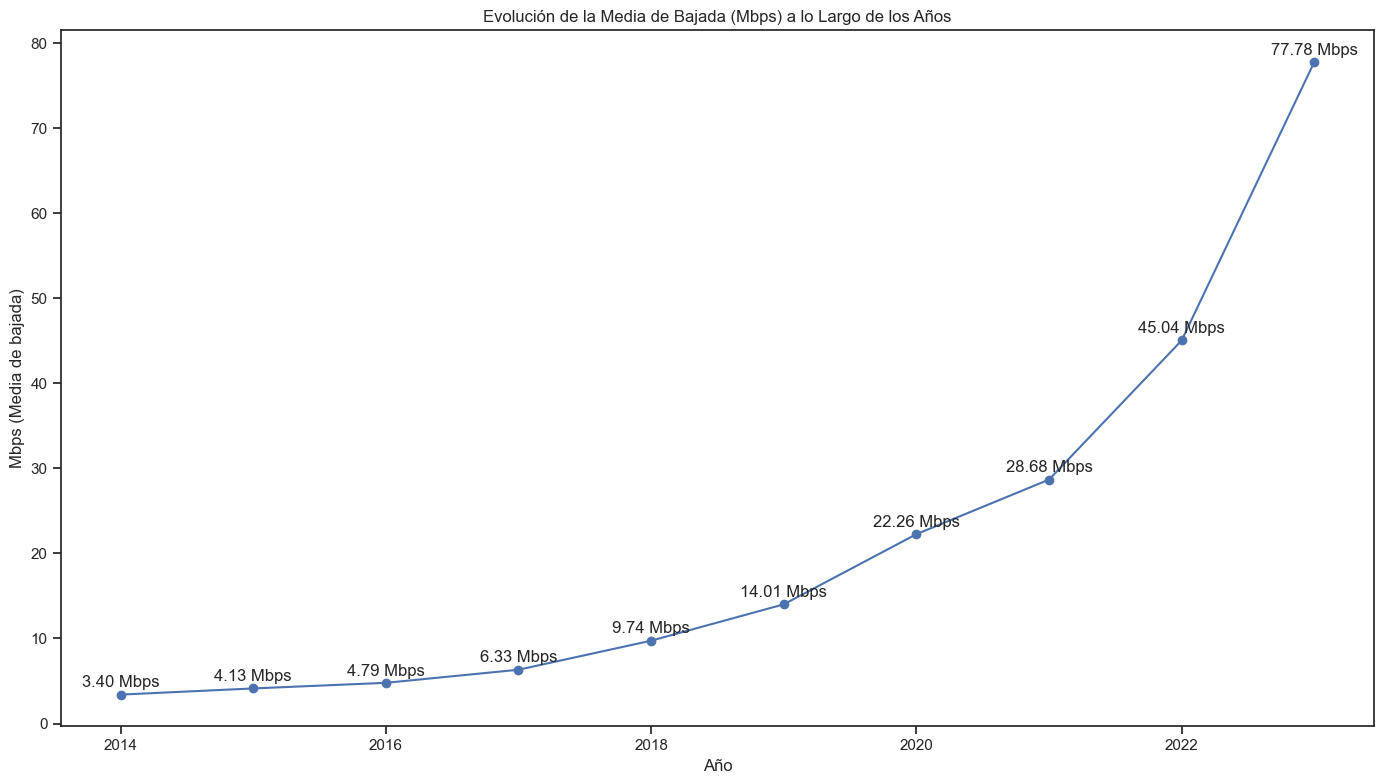

In [8]:


# Suponiendo que 'internet' es el DataFrame con tus datos
df_veloc_baj = internet 

# Agrupar los datos por año y calcular el promedio de Mbps
df_grouped = df_veloc_baj.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(df_grouped['Año'], df_grouped['Mbps (Media de bajada)'], marker='o', linestyle='-', color='b')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Evolución de la Media de Bajada (Mbps) a lo Largo de los Años')

# Añadir los valores en cada punto
for i in range(len(df_grouped)):
    plt.text(df_grouped['Año'][i], df_grouped['Mbps (Media de bajada)'][i] + 0.5, 
             f'{df_grouped["Mbps (Media de bajada)"][i]:.2f} Mbps', 
             ha='center', va='bottom')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Lo mismo vemos represetado en la velocidad media de bajada , con un fuerte aumento a partir del año 2018. Esto podria darse por el implemento de nuevas tecnologias, y el aumento en infraestructura como lo hemos visto en la noticia. anteriormente. 


Graficamos tambien la distribucion de los accesos nacionales totales a internet fijo por rango de velocidad

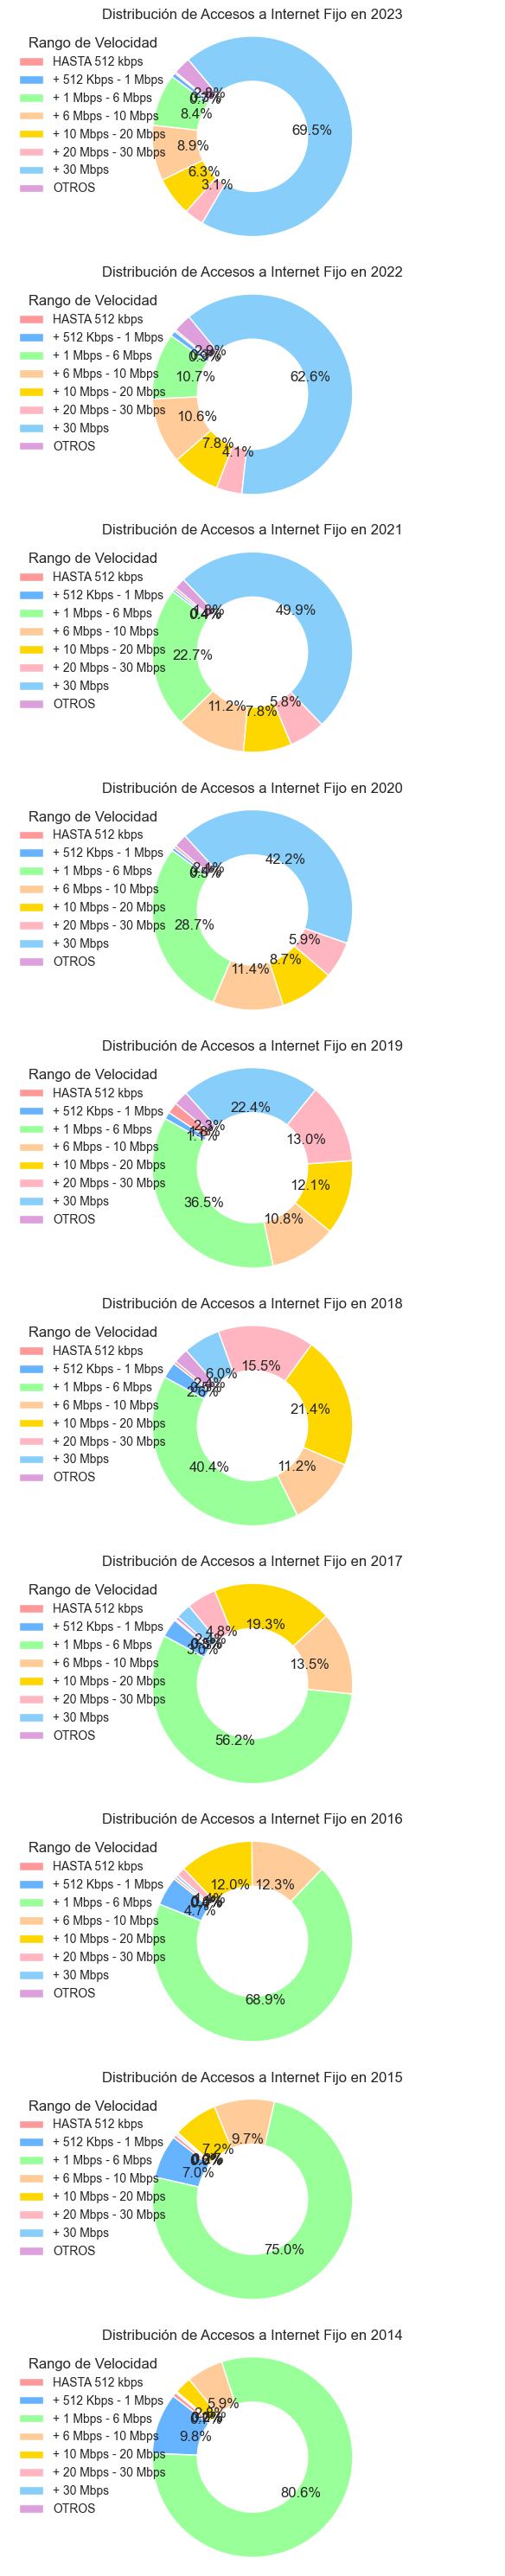

In [9]:


# Suponiendo que 'internet' es el DataFrame con tus datos
df_acceso = internet 

# Rango de velocidades y colores
velocidades = [
    'HASTA 512 kbps',
    '+ 512 Kbps - 1 Mbps',
    '+ 1 Mbps - 6 Mbps',
    '+ 6 Mbps - 10 Mbps',
    '+ 10 Mbps - 20 Mbps',
    '+ 20 Mbps - 30 Mbps',
    '+ 30 Mbps',
    'OTROS'
]
colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FFB6C1', '#87CEFA', '#DDA0DD']

# Obtener los años disponibles
anios = df_acceso['Año'].unique()

# Configurar subplots
fig, axes = plt.subplots(nrows=len(anios), ncols=1, figsize=(6, 3 * len(anios)))

for i, anio in enumerate(anios):
    # Filtrar datos por año
    df_anio = df_acceso[df_acceso['Año'] == anio]
    
    # Sumar los accesos por rango de velocidad para el año
    df_velocidades = df_anio[velocidades].sum().reset_index()
    df_velocidades.columns = ['Rango de Velocidad', 'Total Accesos']

    # Crear gráfico tipo dona
    wedges, texts, autotexts = axes[i].pie(df_velocidades['Total Accesos'], labels=None, 
                                            autopct='%1.1f%%', startangle=140, colors=colores)
    
    # Crear el "agujero" para el gráfico de dona
    centre_circle = plt.Circle((0, 0), 0.55, fc='white')
    axes[i].add_artist(centre_circle)

    # Añadir título
    axes[i].set_title(f'Distribución de Accesos a Internet Fijo en {anio}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Añadir leyenda
    axes[i].legend(wedges, velocidades, title="Rango de Velocidad", loc="upper left", fontsize='small', frameon=False)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Notamo el progreso año tras año, en los rangos de velocidades donde cada ves es mayor la proporcion para velocidades superior a los 30 Mbps, se puede ver reflejado el gran aumento desde el año 2018 hacia adelante. 

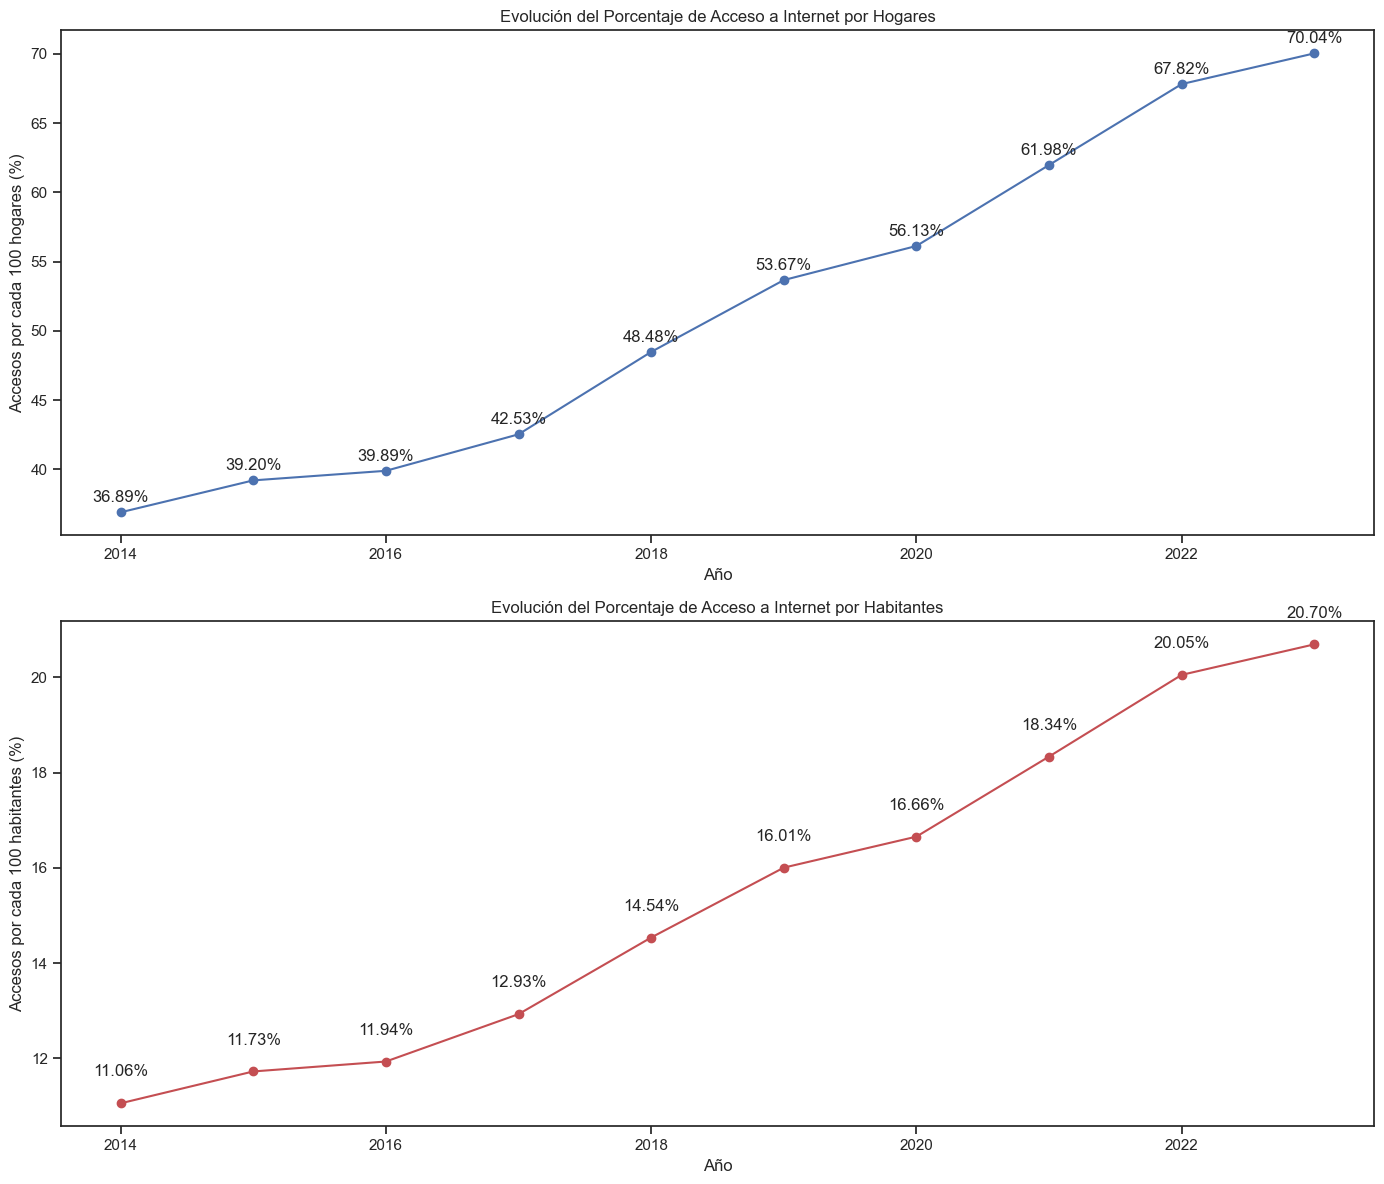

In [10]:

df_acceso = internet 

# Agrupar los datos por año y calcular el promedio del porcentaje de conexiones
df_grouped_hogares = df_acceso.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
df_grouped_habitantes = df_acceso.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()

# Crear el gráfico con subgráficas
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico de accesos por cada 100 hogares
ax[0].plot(df_grouped_hogares['Año'], df_grouped_hogares['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='b')
ax[0].set_title('Evolución del Porcentaje de Acceso a Internet por Hogares')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Accesos por cada 100 hogares (%)')
for i in range(len(df_grouped_hogares)):
    ax[0].text(df_grouped_hogares['Año'][i], df_grouped_hogares['Accesos por cada 100 hogares'][i] + 0.5, 
               f'{df_grouped_hogares["Accesos por cada 100 hogares"][i]:.2f}%', 
               ha='center', va='bottom')

# Gráfico de accesos por cada 100 habitantes
ax[1].plot(df_grouped_habitantes['Año'], df_grouped_habitantes['Accesos por cada 100 hab'], marker='o', linestyle='-', color='r')
ax[1].set_title('Evolución del Porcentaje de Acceso a Internet por Habitantes')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Accesos por cada 100 habitantes (%)')
for i in range(len(df_grouped_habitantes)):
    ax[1].text(df_grouped_habitantes['Año'][i], df_grouped_habitantes['Accesos por cada 100 hab'][i] + 0.5, 
               f'{df_grouped_habitantes["Accesos por cada 100 hab"][i]:.2f}%', 
               ha='center', va='bottom')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Claramente van de la mano una y la otra, es decir si bien los porcentajes no son los mismos, la tendencia es practicamente a la misma hacia la alza. Podriamos decir que una arrastra a la otra.

1. Distribución de accesos por provincia a lo largo de los años

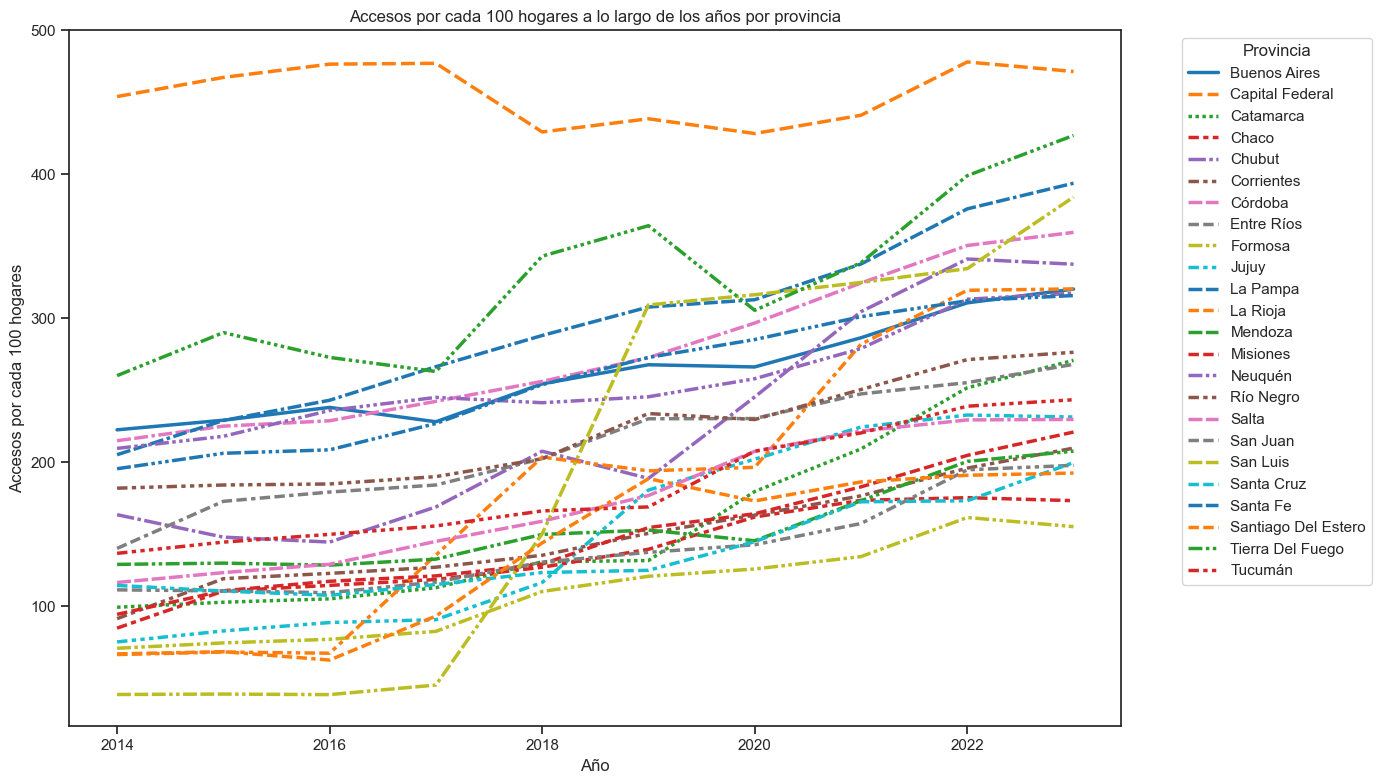

In [11]:

# Agrupar por año y provincia, sumando los accesos por cada 100 hogares
grouped_data = internet.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].sum().reset_index()

# Pivotar los datos para tener los años como columnas
pivot_data = grouped_data.pivot(index='Provincia', columns='Año', values='Accesos por cada 100 hogares')

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data.T,palette='tab10', linewidth=2.5)
plt.title('Accesos por cada 100 hogares a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos ver que si bien el acceso cada 100 hogares a lo largo de los años por provincia tiene una tendencia a la alza, hay casos particulares que se destacaron como el Caso de San Luis, Tierra del Fuego, ,que hubo un gran crecimiento durante el peridodo 2017-2019. Esto podria verse con mejoras en las politicas a nivel nacional o provincial durante ese periodo. 
Caso contrario es el de capital federal, que el acceso por cada 100 hogares en ese periodo ha disminuido. 


Evaluaremos la velocidad media de bajada por provincia.


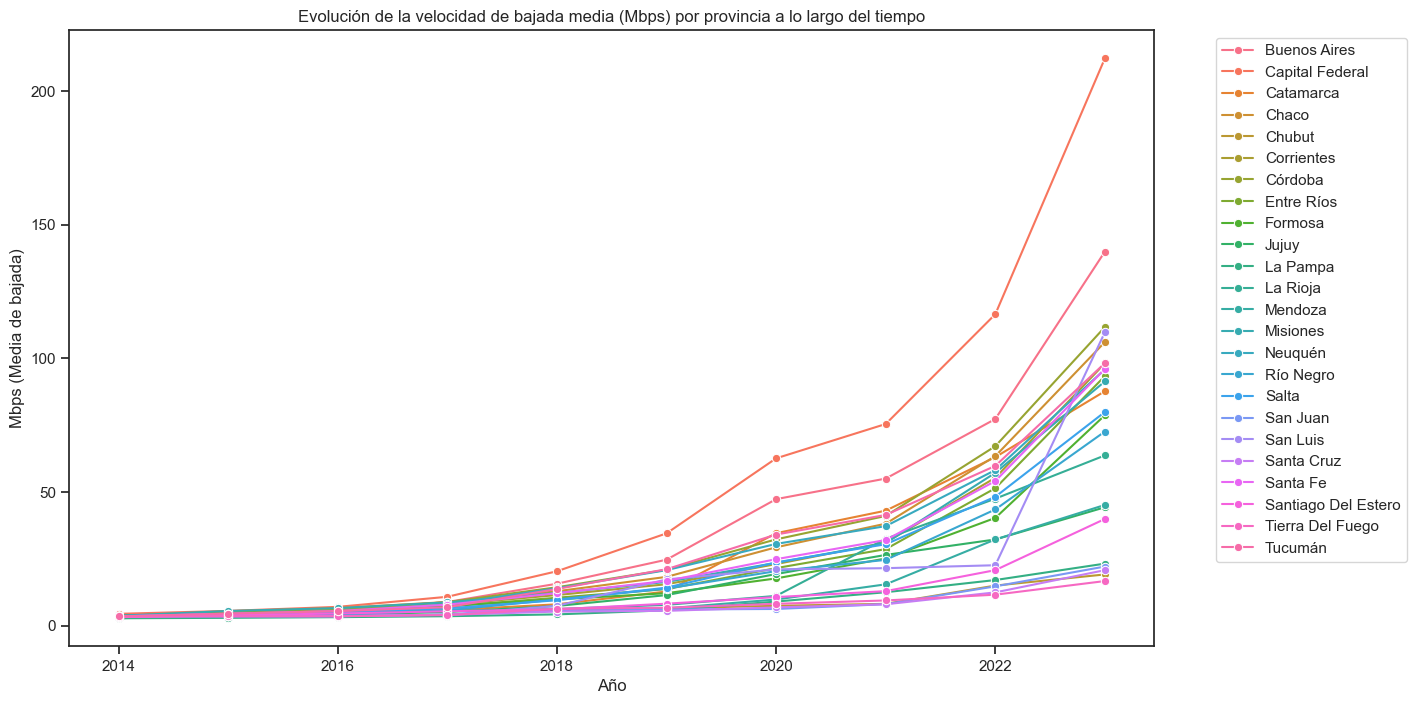

In [12]:

# Cargar el archivo CSV
df = internet

# Agrupar por provincia y año, y calcular la media de Mbps
df_grouped = df.groupby(['Provincia', 'Año'], as_index=False)['Mbps (Media de bajada)'].mean()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de líneas
sns.lineplot(data=df_grouped, x='Año', y='Mbps (Media de bajada)', hue='Provincia', marker='o')

# Añadir título y etiquetas
plt.title('Evolución de la velocidad de bajada media (Mbps) por provincia a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


Claramente vemos como en Buenos Aires y capital federal sobresalen las velocidades de bajada a partir del año 2018/2019 empiezan a despegarse de las demas provincias, y esto podria verse reflejado en la aparicion de la fibra optica en estas provincias. 


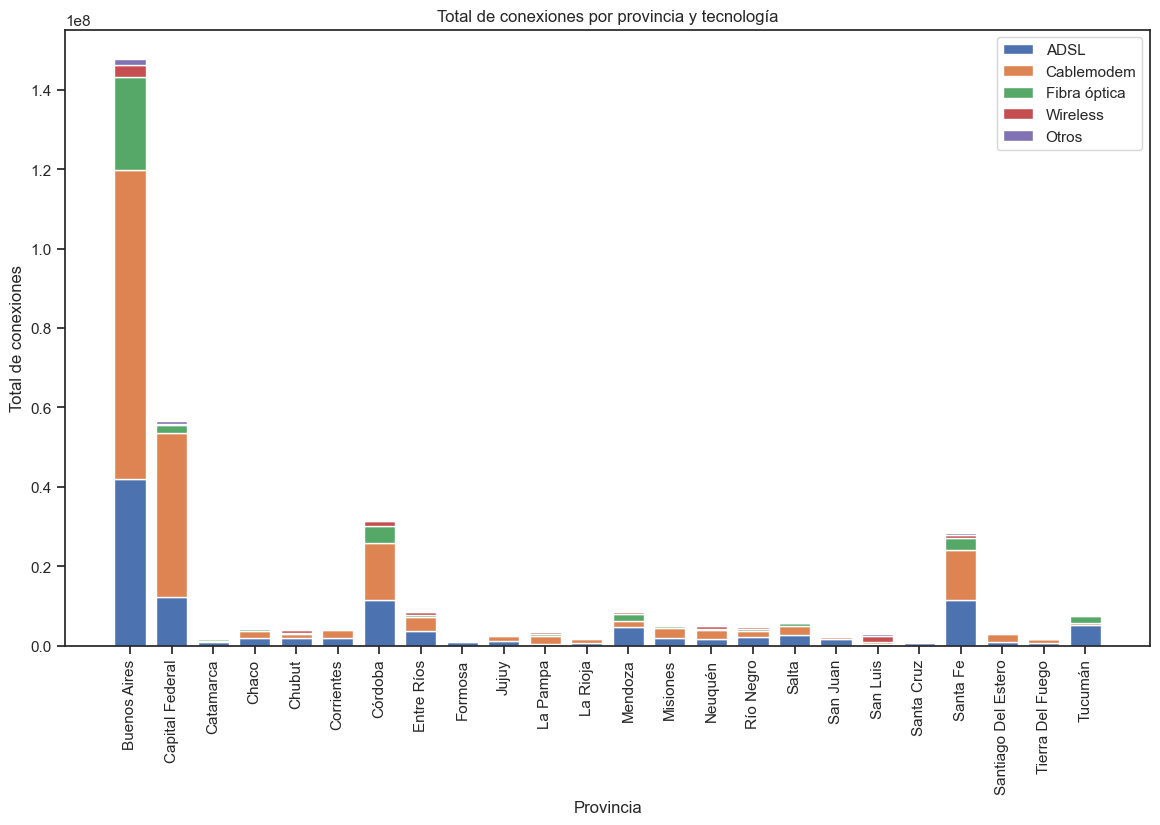

In [13]:

# Seleccionar solo las columnas relevantes
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Agrupar por provincia y sumar las conexiones por tecnología
df_tecnologias = df.groupby('Provincia')[tecnologias].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Configurar el gráfico de barras apiladas
bar_width = 0.75
provincias = df_tecnologias['Provincia']
bar_positions = range(len(provincias))

# Inicializar la base de las barras
bottom = [0] * len(provincias)

# Crear las barras apiladas para cada tecnología
for tecnologia in tecnologias:
    plt.bar(bar_positions, df_tecnologias[tecnologia], width=bar_width, bottom=bottom, label=tecnologia)
    bottom += df_tecnologias[tecnologia]

# Añadir título y etiquetas
plt.title('Total de conexiones por provincia y tecnología')
plt.xlabel('Provincia')
plt.ylabel('Total de conexiones')
plt.xticks(bar_positions, provincias, rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()

Vemos que las provincias que mas fibra optica utlizan como conexion es Buenos Aires, Cordoba, CABA, Mendoza, Santa Fe,Tucuman.
Justamente las provincias mas pobladas de la Argentina. 
Destacar tambien SanLuis, que a traves del Wireless (politica provincial), la gran mayoria utiliza este tipo de tecnologia. 


https://www.enacom.gob.ar/institucional/argentina-avanza-con-la-banda-ancha-movil_n1752

Calculamos la evolucion a partir del año 2016 del uso de las tecnologias sobre el 100 %

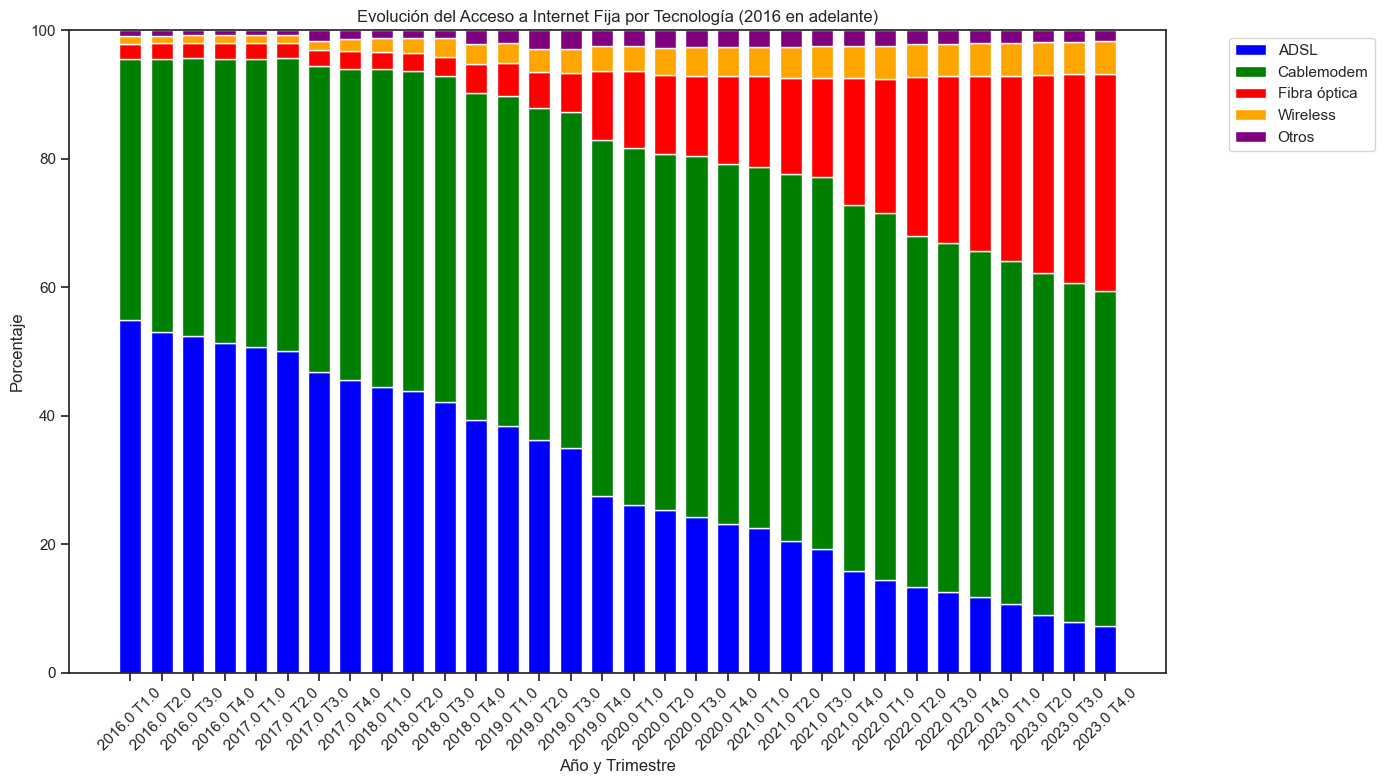

In [14]:

# Filtrar los datos a partir del año 2016
df = df[df['Año'] >= 2016]

# Agrupar los datos por año y trimestre y calcular la suma de accesos
df_grouped = df.groupby(['Año', 'Trimestre'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Calcular el total de accesos por año y trimestre
df_grouped['Total'] = df_grouped.sum(axis=1)

# Calcular el porcentaje de cada tecnología respecto al total
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    df_grouped[f'{tech}_percent'] = df_grouped[tech] / df_grouped['Total'] * 100

# Resetear el índice
df_grouped = df_grouped.reset_index()

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))

# Crear las barras apiladas para cada tecnología
bar_width = 0.7
bar_positions = df_grouped.index

p1 = plt.bar(bar_positions, df_grouped['ADSL_percent'], color='blue', edgecolor='white', width=bar_width)
p2 = plt.bar(bar_positions, df_grouped['Cablemodem_percent'], bottom=df_grouped['ADSL_percent'], color='green', edgecolor='white', width=bar_width)
p3 = plt.bar(bar_positions, df_grouped['Fibra óptica_percent'], bottom=df_grouped['ADSL_percent'] + df_grouped['Cablemodem_percent'], color='red', edgecolor='white', width=bar_width)
p4 = plt.bar(bar_positions, df_grouped['Wireless_percent'], bottom=df_grouped['ADSL_percent'] + df_grouped['Cablemodem_percent'] + df_grouped['Fibra óptica_percent'], color='orange', edgecolor='white', width=bar_width)
p5 = plt.bar(bar_positions, df_grouped['Otros_percent'], bottom=df_grouped['ADSL_percent'] + df_grouped['Cablemodem_percent'] + df_grouped['Fibra óptica_percent'] + df_grouped['Wireless_percent'], color='purple', edgecolor='white', width=bar_width)

# Añadir etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Porcentaje')
plt.title('Evolución del Acceso a Internet Fija por Tecnología (2016 en adelante)')
plt.xticks(bar_positions, [f'{row["Año"]} T{row["Trimestre"]}' for index, row in df_grouped.iterrows()], rotation=45)
plt.ylim(0, 100)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'), bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Vemos la evolucion de las tecnologias de cablemodem y fibra opctica. Mientras que por otro lado la tecnologia ADSL , va disminuyendo 
trimestre a trimestre. Tambien observamos que la tecnologia wireless va creciendo pero a un paso menor.


Vamos a ver los porcentajes promedios de conexiones por cada 100 hogares, discriminado por provincias. 
Identificaremos donde no superan el 65 %, y plantearemos nuestro 2 objetivo (KPI).


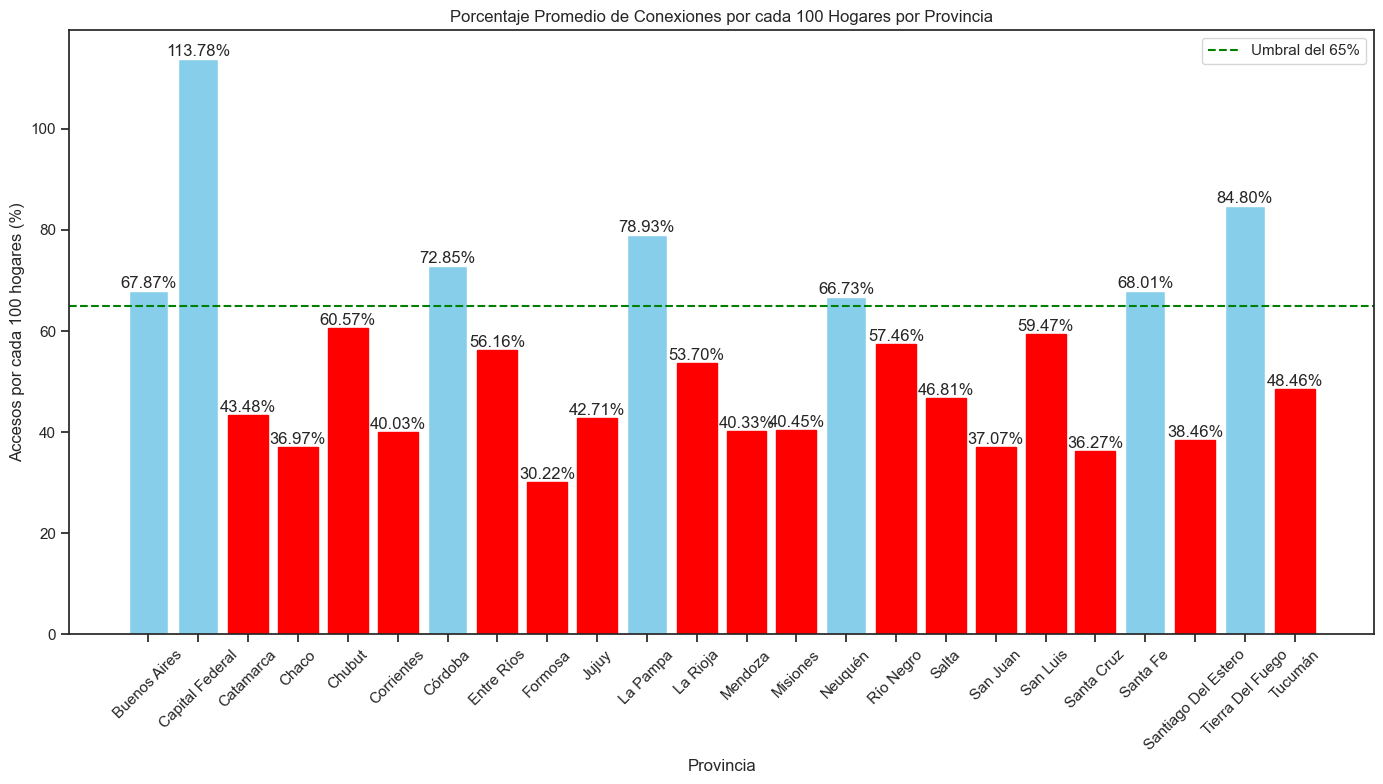

In [15]:
# Cargar el archivo CSV con los datos de acceso a Internet por provincia
df_prov = internet

# Agrupar los datos por provincia y calcular el promedio del porcentaje de conexiones por cada 100 hogares
df_grouped = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index()

# Identificar las provincias donde el promedio no supera el 70%
provincias_bajo_65 = df_grouped[df_grouped['Accesos por cada 100 hogares'] < 65]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(df_grouped['Provincia'], df_grouped['Accesos por cada 100 hogares'], color='skyblue')

# Cambiar el color de las barras que no superan el 70%
for bar, promedio in zip(bars, df_grouped['Accesos por cada 100 hogares']):
    if promedio < 65:
        bar.set_color('red')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares (%)')
plt.title('Porcentaje Promedio de Conexiones por cada 100 Hogares por Provincia')
plt.xticks(rotation=45)
plt.axhline(y=65, color='green', linestyle='--', label='Umbral del 65%')

# Añadir los porcentajes en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

Identificamos que la, provincia de San Luis aun no llega al objetivo por ejemplo pero vemos con nuestros analisis anteriores, que ha tenido un gran avance en el % por cada 100 hogares en los ultimos años , y que su gram mayoria son conexiones wirlees. Entonces pasamos a analizar la evolucion de esa tecnologia por provincia y nos plantearemos nuestro 3 objetivo(KPI), que nos ayudara con nuestros KPI anteriores.

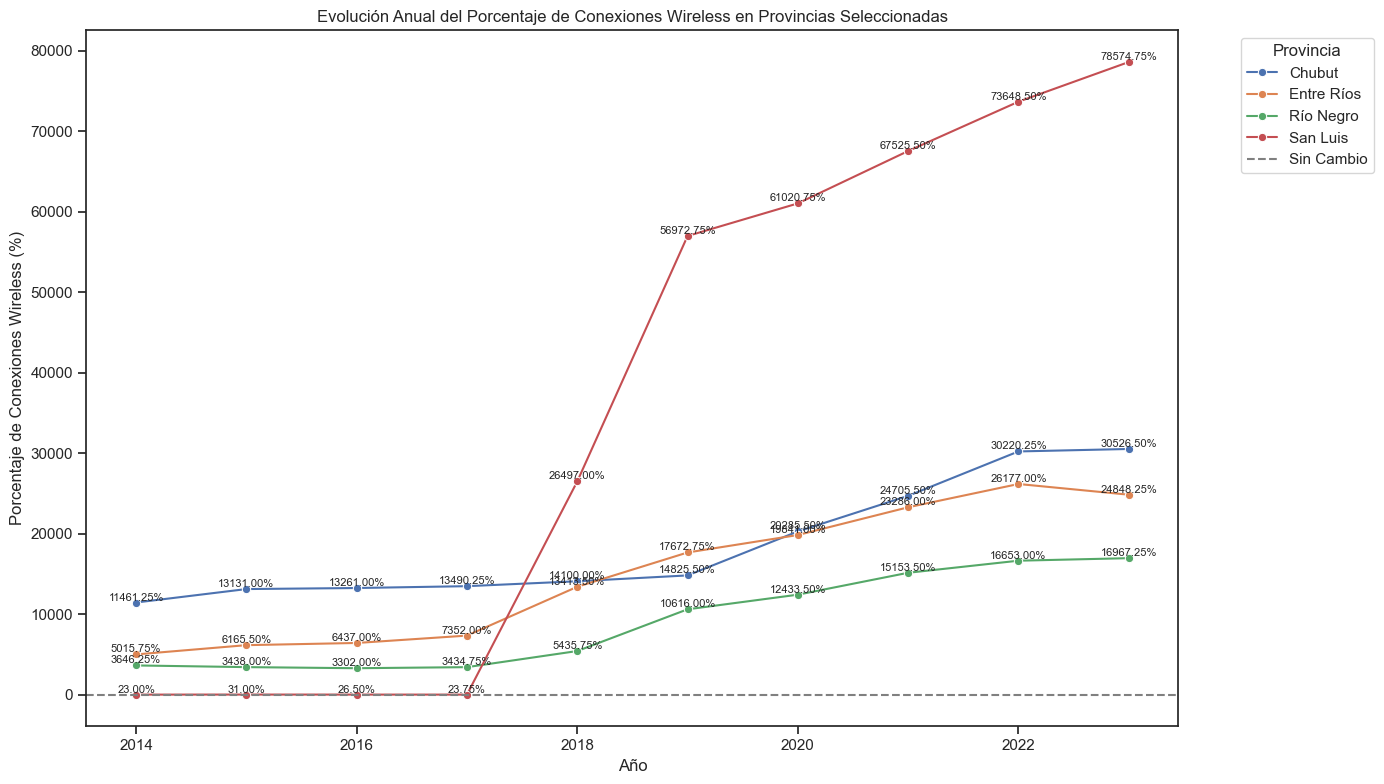

In [16]:


# Filtrar las columnas relevantes
df_prov_prx= internet[['Año', 'Provincia', 'Wireless']]

# Provincias específicas para analizar
provincias_proximas = ['San Luis', 'Chubut', 'Entre Ríos', 'Río Negro']

# Filtrar el DataFrame para incluir solo las provincias seleccionadas
df_filtered = df_prov_prx[df_prov_prx['Provincia'].isin(provincias_proximas)]

# Agrupar los datos por provincia y año, y calcular el promedio de conexiones Wireless
df_grouped = df_filtered.groupby(['Provincia', 'Año'])['Wireless'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Año', y='Wireless', hue='Provincia', marker='o')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Conexiones Wireless (%)')
plt.title('Evolución Anual del Porcentaje de Conexiones Wireless en Provincias Seleccionadas')
plt.axhline(0, color='gray', linestyle='--', label='Sin Cambio')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir los porcentajes en cada punto
for province in df_grouped['Provincia'].unique():
    province_data = df_grouped[df_grouped['Provincia'] == province]
    for i in range(len(province_data)):
        plt.text(province_data['Año'].values[i], province_data['Wireless'].values[i] + 0.5,
                 f'{province_data["Wireless"].values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# Ajustar el diseño
plt.tight_layout()
plt.show()



Vemos que la Provincia de San Luis ha implementado politicas e inversiones en tecnologia wirless seria buena opcion imitar ese tipo de acciones en las provincias que no llegan al objetivo. Si bien San Luis no ha llegado, va en camino.
Y Sumar a nivel nacional la posibilidad de empresas locales , provinciales o nacionales  puedan prestar este tipo de servicio en Argentina, donde en las provincias con zonas muy remotas y donde no llegue el acceso a otro tipo de tecnologias puedan tener internet. 
Dando asi un gran paso en la inversiones de infrastructura para conexiones inalambricas. 

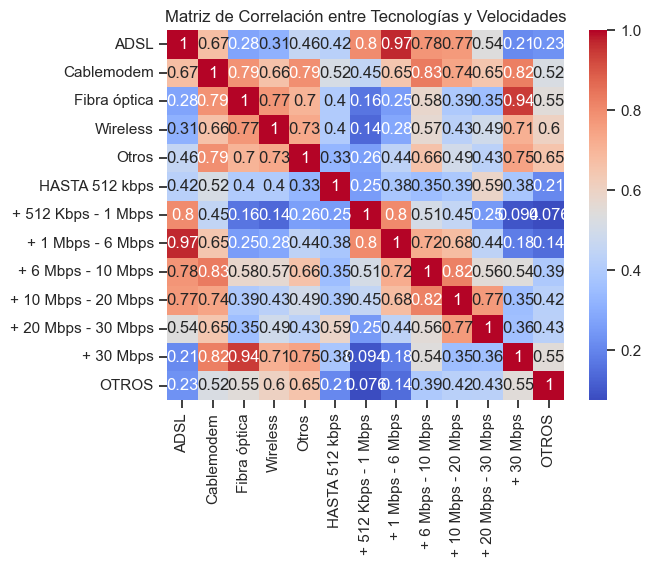

In [19]:
#Analizamos la correlacion entre tecnologias y velocidades 


# Filtrar las columnas relevantes
df_corr = internet[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros','HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']] 

# Calcular la correlación entre variables numéricas
corr = df_corr.corr()

# Mostrar la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Tecnologías y Velocidades')
plt.show()




Vemos la correlación de las tecnologias con las velocidades y efectivamente vemos una alta correlacion entre las velocidades mas altas y las tecnologias modernas. como Cablemodem, wireless y fibra optica. 
